# Baseline Linear regression model using Ordinary Least Squares (OLS)

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Import necessary libraries  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from scipy.stats import norm 
import statistics 

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [5]:
df = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/energy_consumption_clean.csv')


In [6]:
df.head()

,session_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category,KROPPAN BRU,MOHOLTLIA,SELSBAKK,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen,Start_plugin_date,clouds,dewpt,dhi,dni,ghi,max_dhi,max_dni,max_ghi,max_temp,max_temp_ts,max_uv,max_wind_dir,max_wind_spd,max_wind_spd_ts,min_temp,min_temp_ts,precip,precip_gpm,pres,rh,slp,snow,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd,End_plugout_week,End_plugout_month,End_plugout_date,Garage_ID_AdA6,Garage_ID_AdO1,Garage_ID_AdO3,Garage_ID_AsO10,Garage_ID_AsO2,Garage_ID_AsO4,Garage_ID_AsO6,Garage_ID_AsO8,Garage_ID_Bl2,Garage_ID_Bl7,Garage_ID_MS1,Garage_ID_MS11,Garage_ID_MS22,Garage_ID_NR1,Garage_ID_Ris,Garage_ID_SR14,Garage_ID_SR2,Garage_ID_SR4,Garage_ID_UT1,Garage_ID_UT15,Garage_ID_UT2,Garage_ID_UT7,Garage_ID_UT9,User_ID_AdA6-1,User_ID_AdO1-1,User_ID_AdO1-2,User_ID_AdO1-3,User_ID_AdO1-4,User_ID_AdO3-1,User_ID_AdO3-2,User_ID_AdO3-3,User_ID_AdO3-4,User_ID_AsO10-1,User_ID_AsO10-2,User_ID_AsO10-3,User_ID_AsO10-4,User_ID_AsO10-5,User_ID_AsO2-1,User_ID_AsO4-1,User_ID_AsO4-2,User_ID_AsO4-3,User_ID_AsO6-1,User_ID_AsO8-1,User_ID_AsO8-2,User_ID_AsO8-3,User_ID_AsO8-4,User_ID_Bl2-1,User_ID_Bl2-2,User_ID_Bl2-3,User_ID_Bl2-4,User_ID_Bl2-5,User_ID_Bl2-6,User_ID_Bl2-7,User_ID_Bl2-8,User_ID_Bl7-1,User_ID_MS1-1,User_ID_MS1-2,User_ID_MS11-1,User_ID_MS22-1,User_ID_NR1-1,User_ID_NR1-2,User_ID_NR1-3,User_ID_Ris-1,User_ID_Ris-2,User_ID_Ris-3,User_ID_SR14-1,User_ID_SR14-2,User_ID_SR2-1,User_ID_SR2-2,User_ID_SR2-3,User_ID_SR4-1,User_ID_Share-1,User_ID_Share-10,User_ID_Share-11,User_ID_Share-12,User_ID_Share-13,User_ID_Share-14,User_ID_Share-15,User_ID_Share-16,User_ID_Share-17,User_ID_Share-18,User_ID_Share-19,User_ID_Share-2,User_ID_Share-20,User_ID_Share-21,User_ID_Share-22,User_ID_Share-23,User_ID_Share-24,User_ID_Share-25,User_ID_Share-26,User_ID_Share-27,User_ID_Share-28,User_ID_Share-29,User_ID_Share-3,User_ID_Share-30,User_ID_Share-31,User_ID_Share-33,User_ID_Share-34,User_ID_Share-35,User_ID_Share-36,User_ID_Share-37,User_ID_Share-38,User_ID_Share-39,User_ID_Share-4,User_ID_Share-5,User_ID_Share-6,User_ID_Share-7,User_ID_Share-8,User_ID_Share-9,User_ID_UT1-1,User_ID_UT1-2,User_ID_UT15-1,User_ID_UT15-2,User_ID_UT2-1,User_ID_UT7-1,User_ID_UT7-2,User_ID_UT7-3,User_ID_UT7-5
0,24,1,5418,2019-01-09 16:00:00,16,2019-01-10 10:20:00,10,187.0,1.757194e+09,1,3,1,6,4232,2223,629,235,960,2019-01-09,88,-1.7,5,37,5,33,270,43,0.7,1547071200,0.4,225,4.0,1547064000,-0.9,1547020800,1.0,1.0,1006,88.8,1023,13.5,1,115,879,129,25,-0.1,1546988400,225,7.6,2.4,3,1,2019,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,25,1,5418,2019-01-09 20:00:00,20,2019-01-10 15:19:00,15,1038.0,1.833778e+09,1,3,2,2,1772,818,334,125,429,2019-01-09,88,-1.7,5,37,5,33,270,43,0.7,1547071200,0.4,225,4.0,1547064000,-0.9,1547020800,1.0,1.0,1006,88.8,1023,13.5,1,115,879,129,25,-0.1,1546988400,225,7.6,2.4,3,1,2019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28,0,343,2019-01-10 16:00:00,16,2019-01-10 17:20:00,17,51.0,8.319444e+08,1,4,1,1,4212,2233,660,263,916,2019-01-10,97,2.0,5,38,6,33,277,45,7.8,1547139600,0.4,218,10.0,1547157600,-0.1,1547085600,7.5,7.5,992,84.9,1008,16.0,1,119,915,137,18,4.4,1547074800,218,26.8,5.7,3,1,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,29,1,5418,2019-01-10 23:00:00,23,2019-01-11 18:10:00,18,835.0,1.863

In [7]:
df['El_kWh'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6808 entries, 0 to 6807
Series name: El_kWh
Non-Null Count  Dtype  
--------------  -----  
6808 non-null   float64
dtypes: float64(1)
memory usage: 53.3 KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6808 entries, 0 to 6807
Columns: 172 entries, session_ID to User_ID_UT7-5
dtypes: float64(14), int64(155), object(3)
memory usage: 8.9+ MB


In [9]:
df.isna().sum()

session_ID                              0
User_type                               0
Shared_ID                               0
Start_plugin                            0
Start_plugin_hour                       0
End_plugout                             0
End_plugout_hour                        0
El_kWh                                  0
Duration_hours                          0
month_plugin                            0
weekdays_plugin                         0
Plugin_category                         0
Duration_category                       0
KROPPAN BRU                             0
MOHOLTLIA                               0
SELSBAKK                                0
MOHOLT RAMPE 2                          0
Jonsvannsveien vest for Steinanvegen    0
Start_plugin_date                       0
clouds                                  0
dewpt                                   0
dhi                                     0
dni                                     0
ghi                               

In [10]:
# Checking if it's any non convertible values 
non_convertible_values_df = pd.DataFrame(columns=['Column', 'Row'])

for col in df.columns:
    non_convertible_rows = pd.to_numeric(df[col], errors='coerce').isna()
    rows_with_nan = non_convertible_rows[non_convertible_rows].index
    non_convertible_values_df = pd.concat([non_convertible_values_df, pd.DataFrame({'Column': [col] * len(rows_with_nan), 'Row': rows_with_nan})])

print(non_convertible_values_df)


                 Column   Row
0          Start_plugin     0
1          Start_plugin     1
2          Start_plugin     2
3          Start_plugin     3
4          Start_plugin     4
5          Start_plugin     5
6          Start_plugin     6
7          Start_plugin     7
8          Start_plugin     8
9          Start_plugin     9
10         Start_plugin    10
11         Start_plugin    11
12         Start_plugin    12
13         Start_plugin    13
14         Start_plugin    14
15         Start_plugin    15
16         Start_plugin    16
17         Start_plugin    17
18         Start_plugin    18
19         Start_plugin    19
20         Start_plugin    20
21         Start_plugin    21
22         Start_plugin    22
23         Start_plugin    23
24         Start_plugin    24
25         Start_plugin    25
26         Start_plugin    26
27         Start_plugin    27
28         Start_plugin    28
29         Start_plugin    29
30         Start_plugin    30
31         Start_plugin    31
32        

# Add this step to feature engineering

In [11]:
df.select_dtypes(include=['object']).head()


,Start_plugin,End_plugout,Start_plugin_date
0,2019-01-09 16:00:00,2019-01-10 10:20:00,2019-01-09
1,2019-01-09 20:00:00,2019-01-10 15:19:00,2019-01-09
2,2019-01-10 16:00:00,2019-01-10 17:20:00,2019-01-10
3,2019-01-10 23:00:00,2019-01-11 18:10:00,2019-01-10
4,2019-01-11 15:00:00,2019-01-11 17:07:00,2019-01-11


In [12]:
df[['Start_plugin','month_plugin', 'weekdays_plugin', 'Start_plugin_date', 'Start_plugin_hour', 'End_plugout', 'End_plugout_month', 'End_plugout_week', 'End_plugout_date','End_plugout_hour']].head()


,Start_plugin,month_plugin,weekdays_plugin,Start_plugin_date,Start_plugin_hour,End_plugout,End_plugout_month,End_plugout_week,End_plugout_date,End_plugout_hour
0,2019-01-09 16:00:00,1,3,2019-01-09,16,2019-01-10 10:20:00,1,3,2019,10
1,2019-01-09 20:00:00,1,3,2019-01-09,20,2019-01-10 15:19:00,1,3,2019,15
2,2019-01-10 16:00:00,1,4,2019-01-10,16,2019-01-10 17:20:00,1,3,2019,17
3,2019-01-10 23:00:00,1,4,2019-01-10,23,2019-01-11 18:10:00,1,4,2019,18
4,2019-01-11 15:00:00,1,5,2019-01-11,15,2019-01-11 17:07:00,1,4,2019,17


In [13]:
# Changing datetime format
df['Start_plugin'] = pd.to_datetime(df['Start_plugin'], format='%Y-%m-%d %H:%M:%S')
df['Start_plugin_date'] = pd.to_datetime(df['Start_plugin_date'], format='%Y-%m-%d')
df['End_plugout'] = pd.to_datetime(df['End_plugout'], format='%Y-%m-%d %H:%M:%S')


In [14]:
# Extract year
df['Start_plugin_year'] = df['Start_plugin_date'].dt.year.astype('int64')

# Drop the original 'Start_plugin_date' column if needed
df = df.drop(columns=['End_plugout', 'Start_plugin', 'Start_plugin_date'])

In [15]:
# Sanity check
df.select_dtypes(include=['object']).head()


""
0
1
2
3
4


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6808 entries, 0 to 6807
Columns: 170 entries, session_ID to Start_plugin_year
dtypes: float64(14), int64(156)
memory usage: 8.8 MB


In [17]:
# Checking if it's any non convertible values 
non_convertible_values_df = pd.DataFrame(columns=['Column', 'Row'])

for col in df.columns:
    non_convertible_rows = pd.to_numeric(df[col], errors='coerce').isna()
    rows_with_nan = non_convertible_rows[non_convertible_rows].index
    non_convertible_values_df = pd.concat([non_convertible_values_df, pd.DataFrame({'Column': [col] * len(rows_with_nan), 'Row': rows_with_nan})])

print(non_convertible_values_df)


Empty DataFrame
Columns: [Column, Row]
Index: []


## Implementing our model

In [75]:
# Preparing our data for a machine learning model
X = df.drop('El_kWh', axis=1)
y = df['El_kWh']

In [76]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Not Scaled Model

In [77]:
# !! Add constant to our X !!
X_const_train = sm.add_constant(X_train)
X_const_test = sm.add_constant(X_test)

# Check it out 
X_const_train.head()
X_const_test.head()

,const,session_ID,User_type,Shared_ID,Start_plugin_hour,End_plugout_hour,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category,KROPPAN BRU,MOHOLTLIA,SELSBAKK,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen,clouds,dewpt,dhi,dni,ghi,max_dhi,max_dni,max_ghi,max_temp,max_temp_ts,max_uv,max_wind_dir,max_wind_spd,max_wind_spd_ts,min_temp,min_temp_ts,precip,precip_gpm,pres,rh,slp,snow,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd,End_plugout_week,End_plugout_month,End_plugout_date,Garage_ID_AdA6,Garage_ID_AdO1,Garage_ID_AdO3,Garage_ID_AsO10,Garage_ID_AsO2,Garage_ID_AsO4,Garage_ID_AsO6,Garage_ID_AsO8,Garage_ID_Bl2,Garage_ID_Bl7,Garage_ID_MS1,Garage_ID_MS11,Garage_ID_MS22,Garage_ID_NR1,Garage_ID_Ris,Garage_ID_SR14,Garage_ID_SR2,Garage_ID_SR4,Garage_ID_UT1,Garage_ID_UT15,Garage_ID_UT2,Garage_ID_UT7,Garage_ID_UT9,User_ID_AdA6-1,User_ID_AdO1-1,User_ID_AdO1-2,User_ID_AdO1-3,User_ID_AdO1-4,User_ID_AdO3-1,User_ID_AdO3-2,User_ID_AdO3-3,User_ID_AdO3-4,User_ID_AsO10-1,User_ID_AsO10-2,User_ID_AsO10-3,User_ID_AsO10-4,User_ID_AsO10-5,User_ID_AsO2-1,User_ID_AsO4-1,User_ID_AsO4-2,User_ID_AsO4-3,User_ID_AsO6-1,User_ID_AsO8-1,User_ID_AsO8-2,User_ID_AsO8-3,User_ID_AsO8-4,User_ID_Bl2-1,User_ID_Bl2-2,User_ID_Bl2-3,User_ID_Bl2-4,User_ID_Bl2-5,User_ID_Bl2-6,User_ID_Bl2-7,User_ID_Bl2-8,User_ID_Bl7-1,User_ID_MS1-1,User_ID_MS1-2,User_ID_MS11-1,User_ID_MS22-1,User_ID_NR1-1,User_ID_NR1-2,User_ID_NR1-3,User_ID_Ris-1,User_ID_Ris-2,User_ID_Ris-3,User_ID_SR14-1,User_ID_SR14-2,User_ID_SR2-1,User_ID_SR2-2,User_ID_SR2-3,User_ID_SR4-1,User_ID_Share-1,User_ID_Share-10,User_ID_Share-11,User_ID_Share-12,User_ID_Share-13,User_ID_Share-14,User_ID_Share-15,User_ID_Share-16,User_ID_Share-17,User_ID_Share-18,User_ID_Share-19,User_ID_Share-2,User_ID_Share-20,User_ID_Share-21,User_ID_Share-22,User_ID_Share-23,User_ID_Share-24,User_ID_Share-25,User_ID_Share-26,User_ID_Share-27,User_ID_Share-28,User_ID_Share-29,User_ID_Share-3,User_ID_Share-30,User_ID_Share-31,User_ID_Share-33,User_ID_Share-34,User_ID_Share-35,User_ID_Share-36,User_ID_Share-37,User_ID_Share-38,User_ID_Share-39,User_ID_Share-4,User_ID_Share-5,User_ID_Share-6,User_ID_Share-7,User_ID_Share-8,User_ID_Share-9,User_ID_UT1-1,User_ID_UT1-2,User_ID_UT15-1,User_ID_UT15-2,User_ID_UT2-1,User_ID_UT7-1,User_ID_UT7-2,User_ID_UT7-3,User_ID_UT7-5,Start_plugin_year
1616,1.0,1642,0,152,14,18,4.527500e+04,7,1,4,5,3123,1469,555,156,595,35,15.3,57,473,287,107,851,702,30.4,1564412400,4.7,186,5.0,1564430400,18.3,1564434000,4.5,4.5,997,55.1,1012,0.0,274,1371,11343,6887,6580,25.1,1564351200,186,6.8,2.1,0,7,2019,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2019
2473,1.0,2499,0,343,21,0,3.206944e+09,9,6,3,5,941,416,159,50,217,87,6.5,30,262,106,85,725,376,16.5,1569675600,2.2,151,3.0,1569704400,10.0,1569650400,1.0,1.0,987,66.3,1003,0.0,73,719,6280,2555,1749,12.6,1569621600,151,10.4,2.3,6,9,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019
1092,1.0,1118,1,5418,21,7,1.014361e+09,5,2,3,3,1630,714,302,118,441,72,0.6,62,510,320,110,867,748,9.7,1559048400,3.3,227,4.0,1559052000,2.7,1559073600,1.0,1.0,988,74.8,1004,0.0,184,1486,12250,7675,4406,4.9,1558994400,227,9.2,2.1,2,5,2019,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019
4751,1.0,4777,1,5418,19,7,1.185972e+09,12,7,2,3,2083,973,330,113,565,98,-4.1,4,29,4,30,241,36,0.7,1575759600,0.4,151,4.0,1575759600,-2.8,1575784800,7.5,7.5,960,80.7,975,124.0,1,100,707,97,24,-1.1,15

,const,session_ID,User_type,Shared_ID,Start_plugin_hour,End_plugout_hour,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category,KROPPAN BRU,MOHOLTLIA,SELSBAKK,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen,clouds,dewpt,dhi,dni,ghi,max_dhi,max_dni,max_ghi,max_temp,max_temp_ts,max_uv,max_wind_dir,max_wind_spd,max_wind_spd_ts,min_temp,min_temp_ts,precip,precip_gpm,pres,rh,slp,snow,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd,End_plugout_week,End_plugout_month,End_plugout_date,Garage_ID_AdA6,Garage_ID_AdO1,Garage_ID_AdO3,Garage_ID_AsO10,Garage_ID_AsO2,Garage_ID_AsO4,Garage_ID_AsO6,Garage_ID_AsO8,Garage_ID_Bl2,Garage_ID_Bl7,Garage_ID_MS1,Garage_ID_MS11,Garage_ID_MS22,Garage_ID_NR1,Garage_ID_Ris,Garage_ID_SR14,Garage_ID_SR2,Garage_ID_SR4,Garage_ID_UT1,Garage_ID_UT15,Garage_ID_UT2,Garage_ID_UT7,Garage_ID_UT9,User_ID_AdA6-1,User_ID_AdO1-1,User_ID_AdO1-2,User_ID_AdO1-3,User_ID_AdO1-4,User_ID_AdO3-1,User_ID_AdO3-2,User_ID_AdO3-3,User_ID_AdO3-4,User_ID_AsO10-1,User_ID_AsO10-2,User_ID_AsO10-3,User_ID_AsO10-4,User_ID_AsO10-5,User_ID_AsO2-1,User_ID_AsO4-1,User_ID_AsO4-2,User_ID_AsO4-3,User_ID_AsO6-1,User_ID_AsO8-1,User_ID_AsO8-2,User_ID_AsO8-3,User_ID_AsO8-4,User_ID_Bl2-1,User_ID_Bl2-2,User_ID_Bl2-3,User_ID_Bl2-4,User_ID_Bl2-5,User_ID_Bl2-6,User_ID_Bl2-7,User_ID_Bl2-8,User_ID_Bl7-1,User_ID_MS1-1,User_ID_MS1-2,User_ID_MS11-1,User_ID_MS22-1,User_ID_NR1-1,User_ID_NR1-2,User_ID_NR1-3,User_ID_Ris-1,User_ID_Ris-2,User_ID_Ris-3,User_ID_SR14-1,User_ID_SR14-2,User_ID_SR2-1,User_ID_SR2-2,User_ID_SR2-3,User_ID_SR4-1,User_ID_Share-1,User_ID_Share-10,User_ID_Share-11,User_ID_Share-12,User_ID_Share-13,User_ID_Share-14,User_ID_Share-15,User_ID_Share-16,User_ID_Share-17,User_ID_Share-18,User_ID_Share-19,User_ID_Share-2,User_ID_Share-20,User_ID_Share-21,User_ID_Share-22,User_ID_Share-23,User_ID_Share-24,User_ID_Share-25,User_ID_Share-26,User_ID_Share-27,User_ID_Share-28,User_ID_Share-29,User_ID_Share-3,User_ID_Share-30,User_ID_Share-31,User_ID_Share-33,User_ID_Share-34,User_ID_Share-35,User_ID_Share-36,User_ID_Share-37,User_ID_Share-38,User_ID_Share-39,User_ID_Share-4,User_ID_Share-5,User_ID_Share-6,User_ID_Share-7,User_ID_Share-8,User_ID_Share-9,User_ID_UT1-1,User_ID_UT1-2,User_ID_UT15-1,User_ID_UT15-2,User_ID_UT2-1,User_ID_UT7-1,User_ID_UT7-2,User_ID_UT7-3,User_ID_UT7-5,Start_plugin_year
4866,1.0,4892,1,5418,19,7,1.211139e+09,12,3,2,4,2455,1154,420,189,697,88,-3.7,4,27,4,28,226,33,6.8,1576065600,0.6,185,11.0,1576026000,-1.3,1576018800,0.5,0.5,967,52.3,983,0.0,2,92,636,85,52,5.4,1576018800,185,18.4,5.7,3,12,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019
1323,1.0,1349,1,5418,15,15,1.955556e+08,6,4,1,1,5350,3052,899,396,1240,98,10.7,65,533,339,111,869,769,20.9,1561035600,2.0,168,4.0,1560981600,12.9,1561003200,2.0,2.0,988,71.6,1003,0.0,88,1556,12786,8133,2106,16.0,1560981600,168,7.6,2.5,3,6,2019,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019
2470,1.0,2496,1,5418,17,18,1.217500e+04,9,6,1,1,2635,1102,502,196,674,87,6.5,30,262,106,85,725,376,16.5,1569675600,2.2,151,3.0,1569704400,10.0,1569650400,1.0,1.0,987,66.3,1003,0.0,73,719,6280,2555,1749,12.6,1569621600,151,10.4,2.3,5,9,2019,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019
4233,1.0,4259,1,5418,15,18,2.579444e+09,11,7,1,1,2955,1457,488,151,779,79,-0.8,7,54,9,39,345,65,3.6,1574557200,0.8,144,2.0,1574557200,-1.8,1574571600,0.0,0.0,1001,92.3,1018,0.0,3,159,1308,218,61,0.3,157

In [78]:
# 1. Defining model
myregression = sm.OLS(y_train, X_const)

# 2. Fitting Model 
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 El_kWh   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     38.78
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:10:46   Log-Likelihood:                -44126.
No. Observations:                5446   AIC:                         8.856e+04
Df Residuals:                    5291   BIC:                         8.959e+04
Df Model:                         154                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -2.087e+05    1.2e+06     -0.174      0.862   -2.56e+06    2.14e+06
session_ID                               0.0006      0.064      0.009      0.993      -0.125       0.126
User_type                            -2569.2803   1741.906     -1.475      0.140   -5984.135     845.574
Shared_ID                                0.5440      0.333      1.634      0.102      -0.108       1.196
Start_plugin_hour                       -7.0163      4.381     -1.602      0.109     -15.604       1.571
End_plugout_hour                       -24.2822      2.551     -9.520      0.000     -29.282     -19.282
Duration_hours                        1.421e-08    5.3e-09      2.683      0.007    3.83e-09    2.46e-08
month_plugin                          -228.0138    101.907     -2.237      0.025    -427.793     -28.235
weekdays_plugin                         32.6700      7.370      4.433      0.000      18.221      47.119
Plugin_category                        -32.4584     14.607     -2.222      0.026     -61.094      -3.823
Duration_category                       92.0407      6.563     14.024      0.000      79.175     104.907
KROPPAN BRU                             -0.1099      0.061     -1.791      0.073      -0.230       0.010
MOHOLTLIA                               -0.0217      0.069     -0.314      0.754      -0.158       0.114
SELSBAKK                                 0.2337      0.299      0.783      0.434      -0.351       0.819
MOHOLT RAMPE 2                           0.1305      0.434      0.301      0.764      -0.721       0.982
Jonsvannsveien vest for Steinanvegen     0.1131      0.192      0.587      0.557      -0.264       0.490
clouds                                   1.0595      0.895      1.184      0.237      -0.695       2.814
dewpt                                  -26.2227     38.841     -0.675      0.500    -102.367      49.921
dhi                                     78.2190     40.848      1.915      0.056      -1.860     158.298
dni                                    -19.8085     22.631     -0.875      0.381     -64.175      24.558
ghi                                    -70.9323     38.273     -1.853      0.064    -145.964       4.099
max_dhi                                 22.5087     39.899      0.564      0.573     -55.709     100.727
max_dni                                 -1.7373      3.036     -0.572      0.567      -7.688       4.214
max_ghi                                 -3.8043      2.722     -1.397      0.162      -9.141       1.532
max_temp                                -1.7007     10.232     -0.166      0.868     -21.760      18.359
max_temp_ts                              0.0003      0.001      0.422      0.673      -0.001       0.002
max_uv                                

***Dependent Variable:***
The variable we are trying to predict is El_kWh.

***R-squared:***
The model explains 53% of the variance in El_kWh.

***Number of Observations:***
WE have 5446 observations.

***Number of Predictors:***
You have 154 predictors (independent variables) in our model.

Covariance Type: The model assumes non-robust covariance.

In [79]:
# Soft Predictions
y_proba_train = myregression_results.predict(X_const_train)
y_proba_test = myregression_results.predict(X_test_const)

In [80]:
# coefficient values
myregression_results.params

const                                  -2.087335e+05
session_ID                              5.894794e-04
User_type                              -2.569280e+03
Shared_ID                               5.440000e-01
Start_plugin_hour                      -7.016264e+00
End_plugout_hour                       -2.428215e+01
Duration_hours                          1.420674e-08
month_plugin                           -2.280138e+02
weekdays_plugin                         3.266998e+01
Plugin_category                        -3.245838e+01
Duration_category                       9.204075e+01
KROPPAN BRU                            -1.098928e-01
MOHOLTLIA                              -2.172655e-02
SELSBAKK                                2.337144e-01
MOHOLT RAMPE 2                          1.305478e-01
Jonsvannsveien vest for Steinanvegen    1.130899e-01
clouds                                  1.059491e+00
dewpt                                  -2.622270e+01
dhi                                     7.8219

In [81]:
# Going from soft predictions (probabilities) to hard predictions (1 or 0)
threshold = 0.5

y_predict_train = np.where(y_proba_train >= threshold, 1, 0)
y_predict_test = np.where(y_proba_test >= threshold, 1, 0)

print("Model's Predictions:")
print(y_predict_train)
print("Model's Predictions:")
print(y_predict_test)

Model's Predictions:
[1 1 1 ... 1 1 1]
Model's Predictions:
[1 1 1 ... 1 1 1]


In [82]:
# Calculating accuracy
accuracy_train = (y_predict_train == y_train).sum() / len(y_train)
accuracy_test = (y_predict_test == y_test).sum() / len(y_test)

# Print the accuracy score
print(f'Model accuracy on the training set = {accuracy_train:.4f}')
print(f'Model accuracy on the test set = {accuracy_test:.4f}')

Model accuracy on the training set = 0.0042
Model accuracy on the test set = 0.0037


An accuracy of 0.0042 on training set and 0.0034 on test set is extremely low and may suggest an issue with our model or data.

Here are a few things to consider:

***Data Imbalance:***
Check if your dataset is imbalanced.

***Feature Selection:***
Review the features used in model.

**Independence or No Multicollienearity**

Another important assumption when building a linear regression is that there is no collinearity: the predictor variables are independent of each other.


**Creating some visualizations.**

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Actual vs. Predicted Values')

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Probabilities')

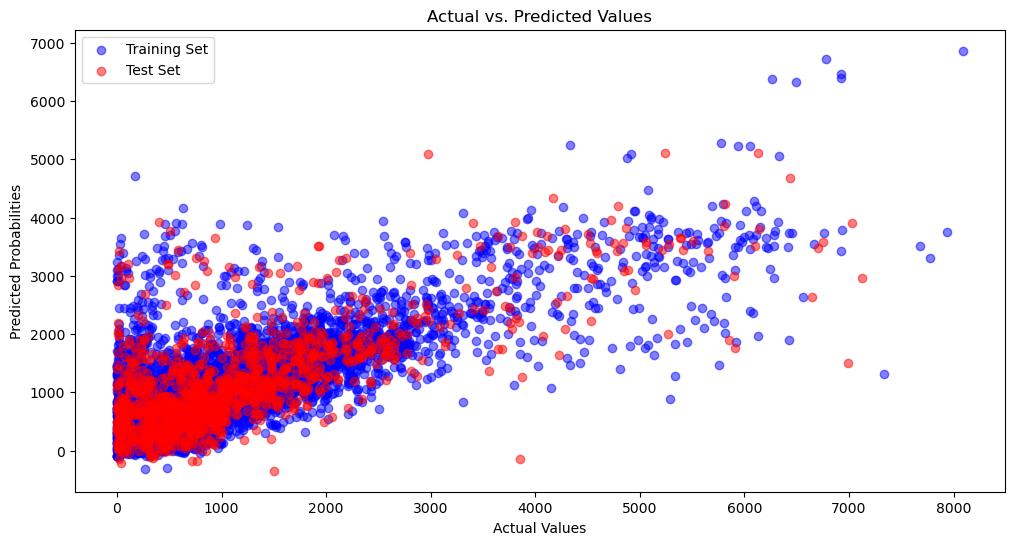

In [86]:
# # Creating a scatter plot for both training and test sets
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting actual vs predicted values for the training set
plt.scatter(y_train, y_proba_train, color='blue', alpha=0.5, label='Training Set')

# Plotting actual vs predicted values for the test set
plt.scatter(y_test, y_proba_test, color='red', alpha=0.5, label='Test Set')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Probabilities')
plt.legend()

# Show the plot
plt.show()


Actual vs. Predicted Values with Line Plot

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Actual vs. Predicted Values with Line Plot')

Text(0.5, 0, 'Observations')

Text(0, 0.5, 'Values')

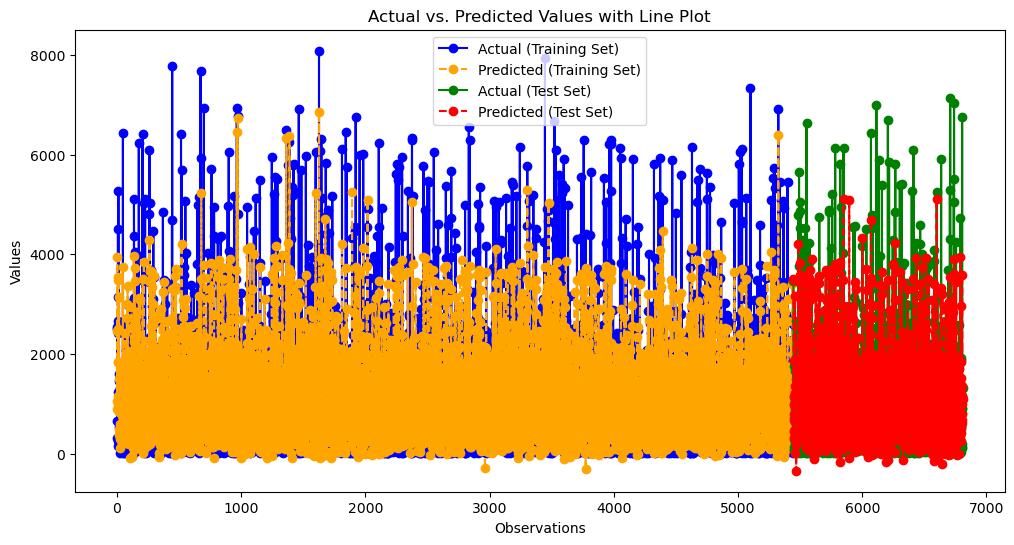

In [87]:
import matplotlib.pyplot as plt

# Create an array for the x-axis (observations)
x_train = range(len(y_train))
x_test = range(len(y_train), len(y_train) + len(y_test))

plt.figure(figsize=(12, 6))

# Plotting actual values for the training set
plt.plot(x_train, y_train, label='Actual (Training Set)', marker='o', linestyle='-', color='blue')

# Plotting predicted probabilities for the training set
plt.plot(x_train, y_proba_train, label='Predicted (Training Set)', marker='o', linestyle='--', color='orange')

# Plotting actual values for the test set
plt.plot(x_test, y_test, label='Actual (Test Set)', marker='o', linestyle='-', color='green')

# Plotting predicted probabilities for the test set
plt.plot(x_test, y_proba_test, label='Predicted (Test Set)', marker='o', linestyle='--', color='red')

# Add labels and legend
plt.title('Actual vs. Predicted Values with Line Plot')
plt.xlabel('Observations')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()


## Assumptions:

### Residuals 
- A residual plot can help to visualize whether the error in the model is random or non-random 
- The distribution of the residual values should appear to be normally distributed

<Figure size 640x480 with 0 Axes>

(array([1.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 1.500e+01, 2.300e+01,
        1.200e+01, 1.800e+01, 2.900e+01, 6.400e+01, 9.900e+01, 1.760e+02,
        3.670e+02, 6.580e+02, 1.083e+03, 1.301e+03, 8.230e+02, 3.770e+02,
        1.460e+02, 6.900e+01, 4.600e+01, 4.000e+01, 1.900e+01, 2.100e+01,
        1.400e+01, 1.500e+01, 9.000e+00, 4.000e+00, 6.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-4545.76186871, -4243.83072976, -3941.8995908 , -3639.96845185,
        -3338.0373129 , -3036.10617394, -2734.17503499, -2432.24389604,
        -2130.31275708, -1828.38161813, -1526.45047918, -1224.51934022,
         -922.58820127,  -620.65706232,  -318.72592336,   -16.79478441,
          285.13635454,   587.0674935 ,   888.99863245,  1190.9297714 ,
         1492.86091036,  1794.79204931,  2096.72318826,  2398.65432722,
         2700.58546617,  3002.51660512,  3304.44774408,  3606.37888303,
         3908.31002198,  4210.24116094,  4512.17229989,  4814

Text(0.5, 1.0, 'Distribution of residual values')

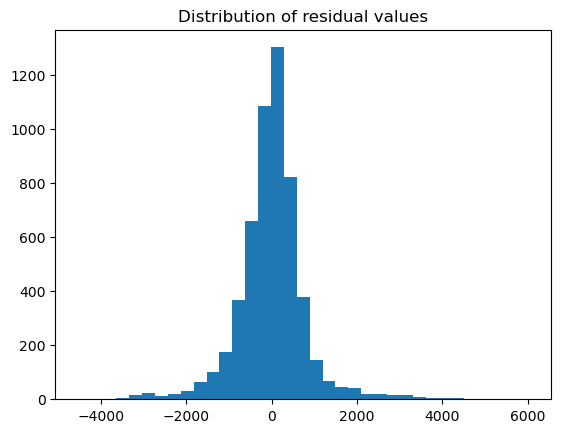

In [88]:
plt.figure()
plt.hist(myregression_results.resid, bins = 35)
plt.title('Distribution of residual values')
plt.show()

Normaly distributed
$$ H_0 : \text{Data is normally distributed}  \quad vs. \quad H_1 : \text{Data is not normally distributed} $$

Let's take a look at the Shaprio-Wilk test.



In [89]:
# calculating the shapiro test statisic and its p-value

print("Shapiro-Wilk Test: ", stats.shapiro(myregression_results.resid))


Shapiro-Wilk Test:  ShapiroResult(statistic=0.9129690527915955, pvalue=0.0)


The null hypothesis for the Shapiro-Wilk test is that the data are normally distributed. 
Because the p-value is less than 0.05, then the null hypothesis that the data are normally distributed is rejected.

<Figure size 640x480 with 0 Axes>

((array([-3.65765175, -3.42365798, -3.29475915, ...,  3.29475915,
          3.42365798,  3.65765175]),
  array([-4545.76186871, -3608.86244125, -3523.59562983, ...,
          4461.17608493,  4517.70503729,  6021.82799466])),
 (763.740323936956, -0.0014820736531293607, 0.955153239164454))

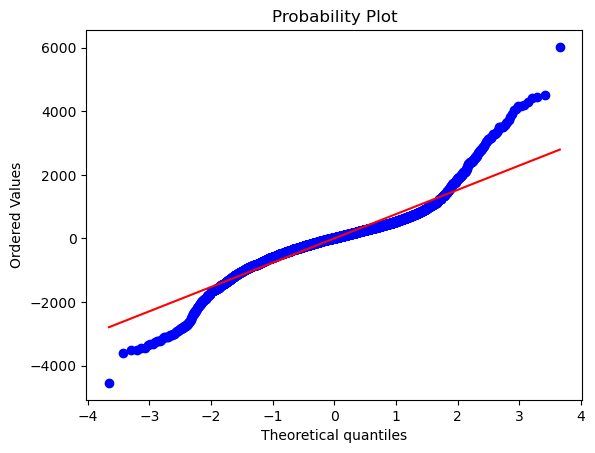

In [90]:
# Normal Q-Q plot

plt.figure()
stats.probplot(myregression_results.resid, dist="norm", plot=plt)
plt.show()

The dots on the left and right show some outliers, while it follow normal distribution between -2 and 2, it starts deviating on the end

Text(0.5, 1.0, 'Residual Plot - Training Set')

Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residual Plot - Test Set')

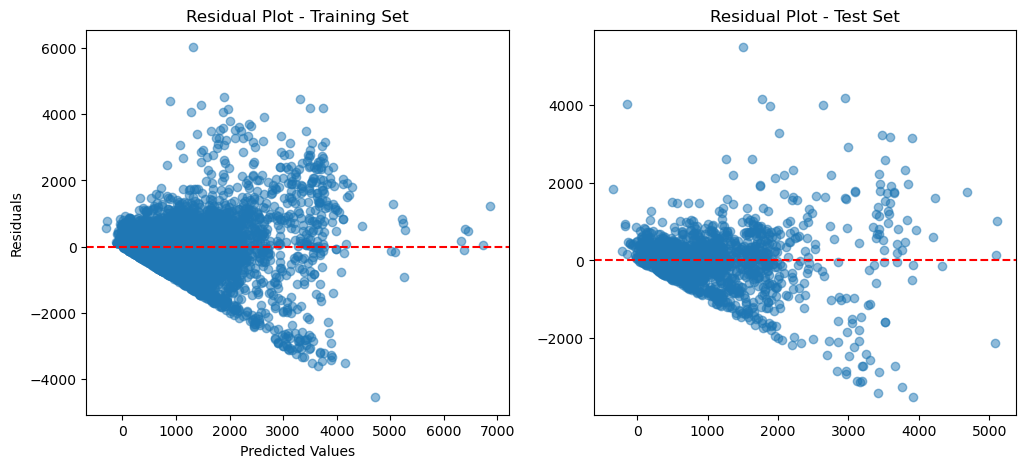

In [91]:
import matplotlib.pyplot as plt

# Calculating residuals
residuals_train = y_train - y_proba_train
residuals_test = y_test - y_proba_test

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Residual plot for the training set
axes[0].scatter(y_proba_train, residuals_train, alpha=0.5)
#  indicating the zero residual line
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title('Residual Plot - Training Set')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')

# Residual plot for the test set
axes[1].scatter(y_proba_test, residuals_test, alpha=0.5)
#  indicating the zero residual line
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title('Residual Plot - Test Set')


Looks like  a right-skewed distribution of residuals, where most of the residuals are concentrated on the lower end of the predicted values. This is visible in the triangular pattern. A right-skewed distribution of residuals suggests that the model tends to underestimate rather than overestimate the target variable.

It seems that the predicted values tend to be lower than the actual values for most observations.

Conclusion:
We need to go back to EDA and work on our feature variables to improve our model.

# Scaled Model

In [70]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

# !! Add constant to our X !!
X_const_train = sm.add_constant(X_train_scaled)
X_const_test = sm.add_constant(X_test_scaled)

# Fit Model (this returns a separate object with the parameters)
myregression = sm.OLS(y_train, X_const_train)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

# Soft Predictions on the training set
y_predict_train = myregression_results.predict(X_const_train)
y_predict_test = myregression_results.predict(X_const_test)

# Set the threshold for converting probabilities to 0 or 1
threshold = 0.5

# Convert soft predictions to hard predictions for the training set
y_binary_train = np.where(y_predict_train >= threshold, 1, 0)
y_binary_test = np.where(y_predict_test >= threshold, 1, 0)

# Look at the model's predictions
print("Model's Predictions for Training Set:")
print(y_binary_train)

print("Model's Predictions for Test Set:")
print(y_binary_test)

# Calculating accuracy for the training set
accuracy_train = (y_binary_train == y_train).sum() / len(y_train)
accuracy_test = (y_binary_test == y_test).sum() / len(y_test)

# Print the accuracy score for the training set
print(f'Model accuracy on the training set = {accuracy_train:.4f}')
print(f'Model accuracy on the test set = {accuracy_test:.4f}')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 El_kWh   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     38.52
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:50:00   Log-Likelihood:                -44126.
No. Observations:                5446   AIC:                         8.856e+04
Df Residuals:                    5290   BIC:                         8.959e+04
Df Model:                         155                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.5842    498.276      0.152      0.879    -901.242    1052.411
x1             4.0319    438.022      0.009      0.993    -854.672     862.736
x2         -2569.2867   1742.076     -1.475      0.140   -5984.473     845.900
x3          2946.3145   1802.803      1.634      0.102    -587.922    6480.551
x4          -161.3744    100.762     -1.602      0.109    -358.910      36.161
x5          -558.4893     58.669     -9.519      0.000    -673.504    -443.474
x6           141.9876     52.923      2.683      0.007      38.237     245.738
x7         -2508.1508   1121.078     -2.237      0.025   -4705.926    -310.376
x8           196.0198     44.226      4.432      0.000     109.318     282.722
x9          -227.2087    102.257     -2.222      0.026    -427.675     -26.742
x10          552.2445     39.381     14.023      0.000     475.041     629.448
x11         -601.3335    335.820     -1.791      0.073   -1259.678      57.012
x12          -84.8205    270.453     -0.314      0.754    -615.020     445.379
x13          215.4846    275.245      0.783      0.434    -324.109     755.078
x14           60.1826    200.232      0.301      0.764    -332.355     452.720
x15          155.9510    265.475      0.587      0.557    -364.489     676.391
x16          105.9491     89.513      1.184      0.237     -69.532     281.431
x17         -776.1910   1149.796     -0.675      0.500   -3030.265    1477.883
x18         4849.5772   2532.821      1.915      0.056    -115.798    9814.952
x19         -1.01e+04   1.15e+04     -0.875      0.382   -3.27e+04    1.25e+04
x20        -2.383e+04   1.29e+04     -1.853      0.064    -4.9e+04    1379.757
x21         1913.2390   3391.708      0.564      0.573   -4735.907    8562.385
x22        -1160.5335   2027.931     -0.572      0.567   -5136.114    2815.047
x23        -2819.0099   2017.395     -1.397      0.162   -6773.937    1135.917
x24          -66.1583    398.078     -0.166      0.868    -846.556     714.240
x25         8927.0243   2.12e+04      0.422      0.673   -3.25e+04    5.04e+04
x26          -33.8715    246.708     -0.137      0.891    -517.521     449.778
x27           67.9284     38.738      1.754      0.080      -8.015     143.871
x28           28.6229    161.874      0.177      0.860    -288.717     345.962
x29         -573.8076   1.76e+04     -0.033      0.974   -3.51e+04     3.4e+04
x30         -343.8272    377.189     -0.912      0.362   -1083.274     395.620
x31        -5850.1897    1.5e+04     -0.391      0.696   -3.52e+04    2.35e+04
x32           27.3481     47.597      0.575      0.566     -65.962     120.658
x33           27.3481     47.597      0.575      0.566     -65.962     120.658
x34         1200.6768   1881.445      0.638      0.523   -2487.731    4889.084
x35          319.4475    502.574      0.636      0.525    -665.804    1304.699
x3

Model's Predictions for Training Set:
[1 1 1 ... 1 1 1]
Model's Predictions for Test Set:
[1 1 1 ... 1 1 1]
Model accuracy on the training set = 0.0042
Model accuracy on the test set = 0.0037


Text(0.5, 1.0, 'Actual vs Predicted - Training Set')

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Actual vs Predicted - Test Set')

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Values')

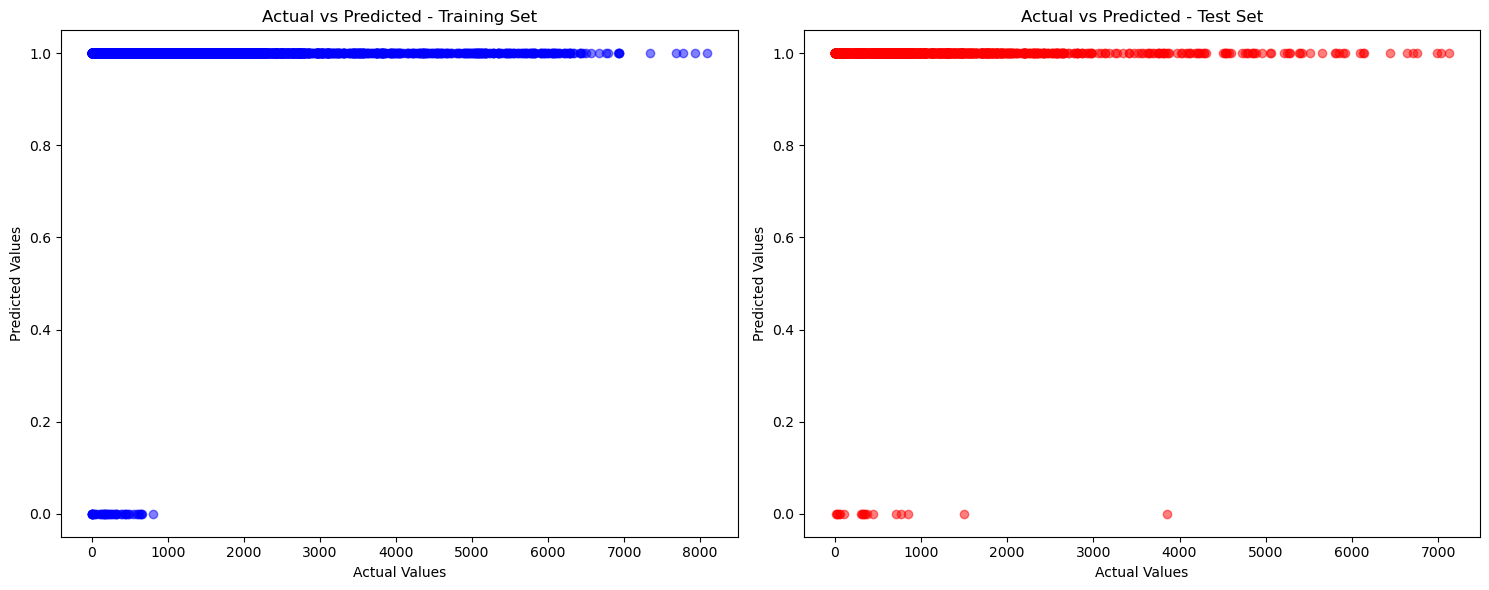

In [95]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for actual vs predicted values - Training Set
ax1.scatter(y_train, y_predict_train, color='blue', alpha=0.5)
ax1.set_title('Actual vs Predicted - Training Set')
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')

# Scatter plot for actual vs predicted values - Test Set
ax2.scatter(y_test, y_predict_test, color='red', alpha=0.5)
ax2.set_title('Actual vs Predicted - Test Set')
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Checking RMSE

In [100]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming y_test is your actual target values for the test set
y_actual = y_test  

# Assuming y_predict_test_not_scaled is the predicted values from your not-scaled model
y_predict_test_not_scaled = myregression_results.predict(X_const_test)

# Calculate RMSE
rmse_not_scaled = sqrt(mean_squared_error(y_actual, y_predict_test_not_scaled))
print(f'RMSE for Not-Scaled Model: {rmse_not_scaled:.4f}')


RMSE for Not-Scaled Model: 805.0163


In [99]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming y_test is your actual target values for the test set
y_actual = y_test  

# Assuming y_predict_test_scaled is the predicted values from your scaled model
y_predict_test_scaled = myregression_results.predict(X_const_test)

# Calculate RMSE
rmse_scaled = sqrt(mean_squared_error(y_actual, y_predict_test_scaled))
print(f'RMSE for Scaled Model: {rmse_scaled:.4f}')


RMSE for Scaled Model: 805.0163
